# The Data Science Process
In this lesson, you’ll learn about the process used for many data science problems. This will serve you as a useful guide on how to approach future data science problems as well as your first project. If some of this material feels like review, feel free to zip ahead to only the required parts. If you want a deeper understanding of any of the areas introduced in this lesson, sit tight because we’ll be doing just that later on on this program.

## CRISP-DM
Given the large number of industries and problems that fall under the umbrella of Data Science, there are a lot of different tools and individual nuances of a particular company of industry for finding solutions.

However, there’s actually a common process used to find many solutions in Data Science. This is known as the Cross Industry Standard Process for Data Mining of CRISP-DM. This process has been an industry standard for analyzing data for years and it has six major phases. First, developing business understanding. Second, developing data understanding. Third, prepping your data to be analyzed. Fourth, modeling the data. Fifth, evaluating the results to answer your questions of interest and finally, deploying changes based on the results of your analysis.

We will look at each of these phases a bit closer in upcoming lessons.

The Data Science Process - Business & Data Understanding
In the previous lesson, you received a quick look at the six steps of the CRISP-DM process. Let’s take a look at the first two steps of this process in a bit more detail.

First, CRISP-DM says your need business understanding, but I think of data science as being more general than just business context, you need to understanding the problem. Are you interested in acquiring new customers?  Are you interested in assessing of a new cancer treatment outperforms existing treatments? Are you interested in finding a better way to communicate, or travel, or retain information? Each of these questions falls under business understanding. 

The second step of the CRISP-DM process is data understanding. This means you need to gain an understanding of the data necessary to answer your question. Sometimes you might have a mountain of data at your disposal that you need to dig through to find insights. Other times you may need to collect data, which means you will have to understand what kind of data we’ll be able to provide you with the insights you need. This is often difficult to know ahead of time, which is why businesses tend to collect all the data they can first, so they can later identify which data they need to use to find their insights.

The Data Science Process - Business & Data Understanding Example
For this lesson, you will get hands-on practice with a dataset from Stack Overflow developer survey results, from 2017. The data for this example is available in the Resources tab for you to follow along on your machine, as well in the workspaces in the classroom. The data was collected by providing a survey to developers on Stack Overflow’s website. A quick look at the columns in the dataset provides a number of questions that we might ask.

This dataset, can provide some insight and to developers around the world, and get you an idea of their experiences. Anything from their advice to other developers, to how they learn new skills, to where they live, or what programming languages they use, can all be understood from this dataset. You will use the workspace and quizzes in the following sections to familiarize yourself with the data, and we will answer a few questions that I found interesting in my analysis and explore questions that you are most interested in.

## The Data Science Process - Business & Data Understanding Example


Working with Categorical Varibles
One of the most common methods for encoding categorical variables is with ones and zeros. There are advantages of this method. With linear models, you have the ability to easily interpret the weights on each of these values, and it provides a lot of flexibility in determining how each level of the categorical variable influences the response.

On the downside, when a categorical variable has lots of levels, creating dummy variables encoded in this way, can add a lot of new columns into your dataset. In this dataset, we’re working with 42,00 additional columns. If the number of columns were to exceed the number of rows, many machine learning algorithms will be unable to optimize for a solution at all.

There are some additional techniques shown in the post and the links below

Let’s try implementing this technique to see how it works out.

### A Look at the Data

In order to get a better understanding of the data we will be looking at throughout this lesson, let's take a look at some of the characteristics of the dataset.

First, let's read in the data and necessary libraries.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As you work through the notebook(s) in this and future parts of this program, you will see some consistency in how to test your solutions to assure they match what we achieved!  In every environment, there is a solution file and a test file.  There will be checks for each solution built into each notebook, but if you get stuck, you may also open the solution notebook to see how we find any of the solutions.  Let's take a look at an example.

### Question 1

**1.** Provide the number of rows and columns in this dataset.

In [39]:
#This is how you see the number of rows and columns in a dataset.
shape_touple = df.shape
print(f'shape_touple => {shape_touple}')

number_of_rows = shape_touple[0]
print(f'number_of_rows => {number_of_rows:,.0F}')

number_of_columns = shape_touple[1]
print(f'number_of_columns => {number_of_columns:,.0F}')



shape_touple => (19102, 154)
number_of_rows => 19,102
number_of_columns => 154


### Question 2

**2.** Which columns had no missing values? Provide a set of column names that have no missing values.

In [45]:
columns_wo_missing_values = set(df.columns[df.isnull().mean() == 0])
print('The columns that had no missing values are:')

display(HTML('<ol>'))

for col_name in columns_wo_missing_values:
    display(HTML(f'<li>{col_name}</li>'))
    
display(HTML('</ol>'))

The columns that had no missing values are:


### Question 3

**3.** Which columns have the most missing values?  Provide a set of column names that have more than 75% if their values missing.

In [46]:
columns_missing_over_sevetyfive_percent = set(df.columns[df.isnull().mean() > .75])
print('The columns that have more than 75% of their values missing:')

display(HTML('<ol>'))

for col_name in columns_missing_over_sevetyfive_percent:
    display(HTML(f'<li>{col_name}</li>'))
    
display(HTML('</ol>'))

The columns that have more than 75% of their values missing:


### Question 4

**4.** Provide a pandas series of the different **Professional** status values in the dataset along with the count of the number of individuals with each status.  Store this pandas series in **status_vals**.  If you are correct, you should see a bar chart of the proportion of individuals in each status.

Professional developer                                  13774
Student                                                  2821
Professional non-developer who sometimes writes code     1782
None of these                                             368
Used to be a professional developer                       357
Name: Professional, dtype: int64


Text(0.5, 1.0, 'What kind of developer are you?')

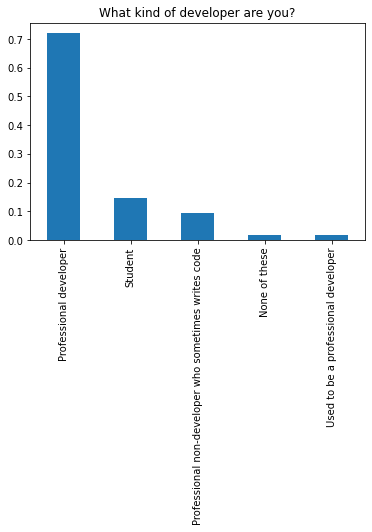

In [52]:
status_vals = df['Professional'].value_counts()

print(status_vals)
(status_vals/df.shape[0]).plot(kind="bar")
plt.title("What kind of developer are you?")

### Question 5

**5.** Provide a pandas series of the different **FormalEducation** status values in the dataset along with the count of how many individuals received that formal education.  Store this pandas series in **ed_vals**.  If you are correct, you should see a bar chart of the proportion of individuals in each status.

Bachelor's degree                                                    8099
Master's degree                                                      4143
Some college/university study without earning a bachelor's degree    2869
Secondary school                                                     2227
Doctoral degree                                                       551
I prefer not to answer                                                409
Primary/elementary school                                             404
Professional degree                                                   255
I never completed any formal education                                145
Name: FormalEducation, dtype: int64


Text(0.5, 1.0, 'What kind of Formal Education You Have?')

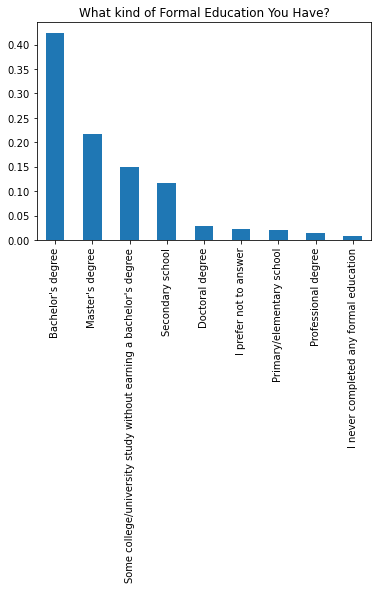

In [61]:
ed_vals = df['FormalEducation'].value_counts()
print(ed_vals)

(ed_vals/df.shape[0]).plot(kind='bar')
plt.title('What kind of Formal Education You Have?')

### Question 6

**6.** Provide a pandas series of the different **Country** values in the dataset along with the count of how many individuals are from each country.  Store this pandas series in **count_vals**.  If you are correct, you should see a bar chart of the proportion of individuals in each country.

United States               4364
India                       1557
United Kingdom              1424
Germany                     1337
Canada                       874
                            ... 
Anguilla                       1
Fiji                           1
Burkina Faso                   1
Virgin Islands (British)       1
Bhutan                         1
Name: Country, Length: 165, dtype: int64


Text(0.5, 1.0, 'What Country are You From?')

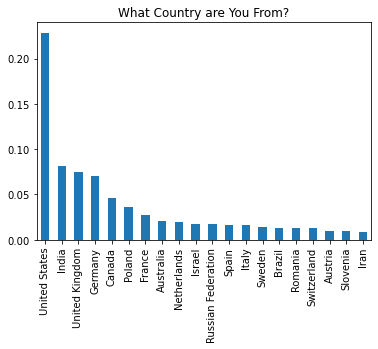

In [66]:
count_vals = df['Country'].value_counts()
print(count_vals)

(count_vals[:20]/df.shape[0]).plot(kind='bar')
plt.title('What Country are You From?')